##  Importation des biblothèques

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import sys
sys.path.append('../')
import numpy as np 
#import keras
from sklearn.model_selection import train_test_split
from fonctionsUtiles import architecture
import warnings
warnings.filterwarnings("ignore")
import matplotlib.pyplot as plt
import time
import keras
from fonctionsUtiles import functions as f
from fonctionsUtiles import error

__init__


Using TensorFlow backend.


In [2]:
#Les arguments pour le modèle DL
args = {"batch_size": 30,
       "epochs": 50,
       "val_split":0.2,
       "early_stop":False,
       "patience":6,
       'number_of_classes':5}

## Importation des donnèes 

In [3]:
X_1 = np.load('../Datasets/New Dataset 14_08_2019/X_saved_New_0.npy')
X_2 = np.load('../Datasets/New Dataset 14_08_2019/X_saved_New_1.npy')
X_3 = np.load('../Datasets/New Dataset 14_08_2019/X_saved_New_2.npy')
X_4 = np.load('../Datasets/New Dataset 14_08_2019/X_saved_New_3.npy')
X_simulator = np.load("../Datasets/Simulation/X_simulator.npy")
X_couloir_1 = np.load('../Datasets/Old dataset/Really old/X_couloir_lumineux.npy')
X_couloir_2 = np.load('../Datasets/Old dataset/Really old/X_couloir_lumineux2.npy')
X_couloir_3 = np.load('../Datasets/Old dataset/Really old/X_couloir_lumineux3.npy')
#X_coulomb = np.load('../Datasets/Old dataset/Really old/X_coulomb.npy')
X_parking = np.load('../Datasets/Old dataset/Really old/X_parking.npy')
X_axionaut = np.load('../Datasets/Axionaut/X_train_axio.npy')

Y_angle_1 = np.load('../Datasets/New Dataset 14_08_2019/Y_saved_New_0.npy')
Y_angle_2 = np.load('../Datasets/New Dataset 14_08_2019/Y_saved_New_1.npy')
Y_angle_3 = np.load('../Datasets/New Dataset 14_08_2019/Y_saved_New_2.npy')
Y_angle_4 = np.load('../Datasets/New Dataset 14_08_2019/Y_saved_New_3.npy')
Y_angle_simulator = np.load('../Datasets/Simulation/Y_simulator.npy')
Y_angle_couloir_1 = np.load('../Datasets/Old dataset/Really old/Y_couloir_lumineux.npy')
Y_angle_couloir_2 = np.load('../Datasets/Old dataset/Really old/Y_couloir_lumineux2.npy')
Y_angle_couloir_3 = np.load('../Datasets/Old dataset/Really old/Y_couloir_lumineux3.npy')
#Y_angle_coulomb = np.load('../Datasets/Old dataset/Really old/Y_coulomb.npy')
Y_angle_parking = np.load('../Datasets/Old dataset/Really old/Y_parking.npy')
Y_angle_axionaut = np.load('../Datasets/Axionaut/Y_train_axio.npy')

Y_speed_1 = np.load('../Datasets/New Dataset 14_08_2019/Z_saved_New_0.npy')
Y_speed_2 = np.load('../Datasets/New Dataset 14_08_2019/Z_saved_New_1.npy')
Y_speed_3 = np.load('../Datasets/New Dataset 14_08_2019/Z_saved_New_2.npy')
Y_speed_4 = np.load('../Datasets/New Dataset 14_08_2019/Z_saved_New_3.npy')

## Preprocessing the data

In [4]:
#On ne prend qu'une partie des données simmulé pour éviter d'en avoir trop
X_simulator = X_simulator[:30000]
Y_simulator = Y_angle_simulator[:30000]

(array([ 267., 1609., 3467., 4673., 5224., 5034., 4561., 3379., 1584.,
         202.]), array([  1.06092863,  18.79515339,  36.52937815,  54.2636029 ,
         71.99782766,  89.73205242, 107.46627718, 125.20050194,
        142.93472669, 160.66895145, 178.40317621]), <a list of 10 Patch objects>)

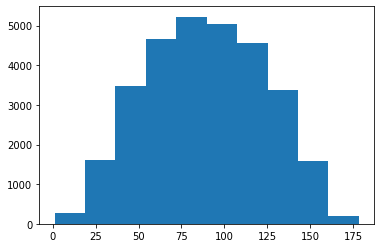

In [5]:
plt.hist(Y_simulator)

In [6]:
#On discrétise pour freinage et non freinage
#Pour la première séquence
Y_acc_1 = np.zeros(Y_speed_1.shape[0])

for i in range (Y_speed_1.shape[0]):
    if Y_speed_1[i]<5:
        Y_acc_1[i] = 1
        
#Pour la deuxième séquence
Y_acc_2 = np.zeros(Y_speed_2.shape[0])

for i in range (Y_speed_2.shape[0]):
    if Y_speed_2[i]<5:
        Y_acc_2[i] = 1 

#Pour la toisième séquence
Y_acc_3 = np.zeros(Y_speed_3.shape[0])

for i in range (Y_speed_3.shape[0]):
    if Y_speed_3[i]<5:
        Y_acc_3[i] = 1

#Pour la quatriière séquence
Y_acc_4 = np.zeros(Y_speed_4.shape[0])

for i in range (Y_speed_4.shape[0]):
    if Y_speed_4[i]<5:
        Y_acc_4[i] = 1

# Etapes des angles

### Avec les données Axionaut et simulator

In [6]:
#Pour 5 classes

Y_simulator[list(np.where(Y_simulator<=35))] = 0  #extrème droite
Y_simulator[list(np.where((Y_simulator>35) & (Y_simulator<=75)))] = 1   #droite
Y_simulator[list(np.where((Y_simulator>75) & (Y_simulator<=110)))] = 2   #Tout droit
Y_simulator[list(np.where((Y_simulator>110) & (Y_simulator<=145)))] = 3    #gauche
Y_simulator[list(np.where((Y_simulator>145) & (Y_simulator<=180)))] = 4      #extrème gauche

(array([ 1697.,     0.,  9170.,     0.,     0., 10133.,     0.,  7490.,
            0.,  1510.]),
 array([0. , 0.4, 0.8, 1.2, 1.6, 2. , 2.4, 2.8, 3.2, 3.6, 4. ]),
 <a list of 10 Patch objects>)

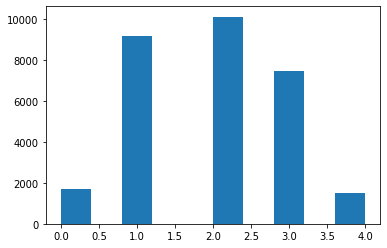

In [7]:
#Stats sur les données simmulé
plt.hist(Y_simulator)

In [8]:
print('The shape of Axionaut dataset is' , Y_angle_axionaut.shape)

The shape of Axionaut dataset is (26449, 5)


In [9]:
Y_stats = np.zeros(Y_angle_axionaut.shape[0])
for i in range (Y_angle_axionaut.shape[0]):
    Y_stats[i] = np.argmax(Y_angle_axionaut[i])

(array([2235.,    0., 5719.,    0.,    0., 8595.,    0., 6671.,    0.,
        3229.]),
 array([0. , 0.4, 0.8, 1.2, 1.6, 2. , 2.4, 2.8, 3.2, 3.6, 4. ]),
 <a list of 10 Patch objects>)

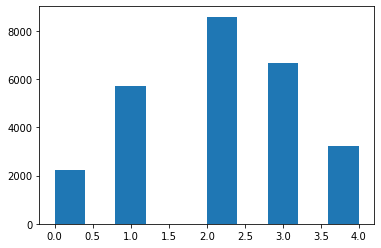

In [10]:
#stats sur les données Axionaut
plt.hist(Y_stats)

In [11]:
Y_temp_simulator = np.zeros((Y_simulator.shape[0] , 5))
for i in range(Y_simulator.shape[0]):
    n = int(Y_simulator[i])
    Y_temp_simulator[i , n] = 1

In [12]:
X_angle = np.concatenate([X_simulator , X_axionaut])
Y_angle = np.concatenate([Y_temp_simulator , Y_angle_axionaut])

### ------------------------------------------------------------------------------------------------------------------------------------------

In [7]:
#On concatenne les différents set de donnée
X = np.concatenate([X_1 , X_2 , X_3 ,X_4 , X_simulator, X_couloir_1, X_couloir_2 , X_couloir_3, X_parking])
Y_angle = np.concatenate([Y_angle_1 , Y_angle_2, Y_angle_3 , Y_angle_4 , Y_simulator, Y_angle_couloir_1, Y_angle_couloir_2, Y_angle_couloir_3, Y_angle_parking])

In [8]:
#Pour les données de freinage on enlève les 270 degrès et on la remplace par 90
Y_angle[list(np.where(Y_angle == 270)[0])] = 90

In [9]:
#On enlève les données où on a marche arrière
truncate = list(np.where(Y_angle>180)[0])

X_angle = np.delete(X , truncate , axis = 0)
Y_angle = np.delete(Y_angle , truncate , axis = 0)

In [10]:
print('The final shape of the training set is' , X_angle.shape )

The final shape of the training set is (48654, 90, 250, 3)


In [11]:
#Transform the problem of angles to a classification problem


#Pour 5 classes

Y_angle[list(np.where(Y_angle<=35))] = 0  #extrème droite
Y_angle[list(np.where((Y_angle>35) & (Y_angle<=75)))] = 1   #droite
Y_angle[list(np.where((Y_angle>75) & (Y_angle<=110)))] = 2   #Tout droit
Y_angle[list(np.where((Y_angle>110) & (Y_angle<=145)))] = 3    #gauche
Y_angle[list(np.where((Y_angle>145) & (Y_angle<=180)))] = 4      #extrème gauche

"""
#Pour 7 classes
Y_angle[list(np.where(Y_angle<=25))] = 0  #extrème droite
Y_angle[list(np.where((Y_angle>25) & (Y_angle<=50)))] = 1 #droite
Y_angle[list(np.where((Y_angle>50) & (Y_angle<=75)))] = 2  #petite droite
Y_angle[list(np.where((Y_angle>75) & (Y_angle<=105)))] = 3   #Tout droit
Y_angle[list(np.where((Y_angle>105) & (Y_angle<=130)))] = 4    #petite gauche
Y_angle[list(np.where((Y_angle>130) & (Y_angle<=155)))] = 5    #gauche
Y_angle[list(np.where((Y_angle>155) & (Y_angle<=180)))] = 6      #extrème gauche
"""

'\n#Pour 7 classes\nY_angle[list(np.where(Y_angle<=25))] = 0  #extrème droite\nY_angle[list(np.where((Y_angle>25) & (Y_angle<=50)))] = 1 #droite\nY_angle[list(np.where((Y_angle>50) & (Y_angle<=75)))] = 2  #petite droite\nY_angle[list(np.where((Y_angle>75) & (Y_angle<=105)))] = 3   #Tout droit\nY_angle[list(np.where((Y_angle>105) & (Y_angle<=130)))] = 4    #petite gauche\nY_angle[list(np.where((Y_angle>130) & (Y_angle<=155)))] = 5    #gauche\nY_angle[list(np.where((Y_angle>155) & (Y_angle<=180)))] = 6      #extrème gauche\n'

### --------------------------------------------------------------------------------------------------

In [12]:
#Train test split
X_train , X_test, Y_train , Y_test = train_test_split(X_angle , Y_angle , test_size = 0.2)

In [13]:
#Train val split
X_train , X_val , Y_train , Y_val = train_test_split(X_train , Y_train , test_size = 0.2)

### -----------------------------------------------------------

In [14]:
#Avoir une dummie_variable

Y_train_output = np.zeros((Y_train.shape[0] ,args['number_of_classes'] ))
Y_val_output = np.zeros((Y_val.shape[0] , args['number_of_classes']))
Y_test_output = np.zeros((Y_test.shape[0] , args['number_of_classes']))

for i in range(Y_train.shape[0]):
    n = int(Y_train[i])
    Y_train_output[i , n] = 1

for i in range (Y_val.shape[0]):
    n = int(Y_val[i])
    Y_val_output[i , n] = 1
    
for i in range(Y_test.shape[0]):
    n = int(Y_test[i])
    Y_test_output[i , n] = 1


### ----------------------------------------------------------

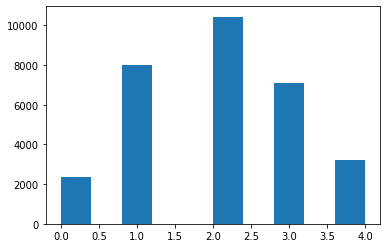

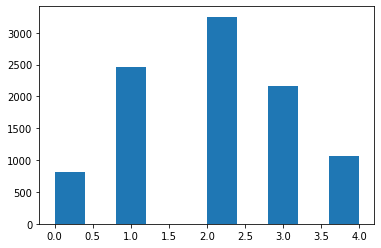

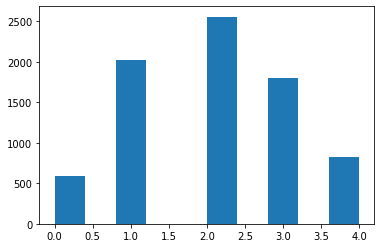

In [15]:
#Stats sur les données
plt.hist(Y_train)
plt.show()

plt.hist(Y_test)
plt.show()

plt.hist(Y_val)
plt.show()

### Model

In [16]:
model_path = '../Models/test 14_08_19/classification_angle_with_no_coulomb'
# Create autopilot model from architectures and print summary
model =  architecture.model_categorical(input_size= (90,250,3))
model.summary()

W0823 10:49:18.354369 140482233395008 deprecation_wrapper.py:119] From /home/othmaneaitboumlik/.local/lib/python3.6/site-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0823 10:49:18.373118 140482233395008 deprecation_wrapper.py:119] From /home/othmaneaitboumlik/.local/lib/python3.6/site-packages/keras/backend/tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0823 10:49:18.374658 140482233395008 deprecation_wrapper.py:119] From /home/othmaneaitboumlik/.local/lib/python3.6/site-packages/keras/backend/tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0823 10:49:18.401961 140482233395008 deprecation_wrapper.py:119] From /home/othmaneaitboumlik/.local/lib/python3.6/site-packages/keras/backend/tensorflow_backend.py:174: The name tf.get_default_session is deprecated. Please

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
img_in (InputLayer)          (None, 90, 250, 3)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 43, 123, 24)       1824      
_________________________________________________________________
batch_normalization_1 (Batch (None, 43, 123, 24)       96        
_________________________________________________________________
activation_1 (Activation)    (None, 43, 123, 24)       0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 20, 60, 32)        19232     
_________________________________________________________________
batch_normalization_2 (Batch (None, 20, 60, 32)        128       
_________________________________________________________________
activation_2 (Activation)    (None, 20, 60, 32)        0         
__________

In [18]:
# Train model
model_name = model_path + '.hdf5'
min_delta=.0005

#checkpoint to save model after each epoch
save_best = keras.callbacks.ModelCheckpoint(model_name, 
                                            monitor='val_loss', 
                                            verbose=1, 
                                            save_best_only=True, 
                                            mode='min')

#stop training if the validation error stops improving.
early_stop = keras.callbacks.EarlyStopping(monitor='val_loss', 
                                           min_delta=min_delta, 
                                           patience=args['patience'], 
                                           verbose=1, 
                                           mode='auto')
callbacks_list = [save_best]

if args['early_stop']:
    callbacks_list.append(early_stop)
    
hist = model.fit(X_train,Y_train_output,
                nb_epoch=args['epochs'], 
                validation_data=(X_val, Y_val_output),
                callbacks = callbacks_list,
                batch_size = 64,
                )

W0823 10:49:46.734536 140482233395008 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Train on 31138 samples, validate on 7785 samples
Epoch 1/50
31138/31138 [==============================] - 21s 673us/step - loss: 1.0109 - acc: 0.5873 - val_loss: 1.0134 - val_acc: 0.6329

Epoch 00001: val_loss improved from inf to 1.01344, saving model to ../Models/test 14_08_19/classification_angle_with_no_coulomb.hdf5
Epoch 2/50
31138/31138 [==============================] - 23s 752us/step - loss: 0.6821 - acc: 0.7238 - val_loss: 0.6881 - val_acc: 0.7358

Epoch 00002: val_loss improved from 1.01344 to 0.68814, saving model to ../Models/test 14_08_19/classification_angle_with_no_coulomb.hdf5
Epoch 3/50
31138/31138 [==============================] - 24s 762us/step - loss: 0.5179 - acc: 0.7886 - val_loss: 0.5022 - val_acc: 0.8058

Epoch 00003: val_loss improved from 0.68814 to 0.50219, saving model to ../Models/test 14_08_19/classification_angle_with_no_coulomb.hdf5
Epoch 4/50
31138/31138 [==============================] - 24s 757us/step - loss: 0.4229 - acc: 0.8302 - val_loss: 0.8729 

31138/31138 [==============================] - 24s 782us/step - loss: 0.0348 - acc: 0.9879 - val_loss: 0.4270 - val_acc: 0.9137

Epoch 00040: val_loss did not improve from 0.28405
Epoch 41/50
31138/31138 [==============================] - 25s 790us/step - loss: 0.0291 - acc: 0.9899 - val_loss: 0.3830 - val_acc: 0.9193

Epoch 00041: val_loss did not improve from 0.28405
Epoch 42/50
31138/31138 [==============================] - 24s 783us/step - loss: 0.0299 - acc: 0.9901 - val_loss: 0.3611 - val_acc: 0.9111

Epoch 00042: val_loss did not improve from 0.28405
Epoch 43/50
31138/31138 [==============================] - 24s 782us/step - loss: 0.0329 - acc: 0.9891 - val_loss: 0.4512 - val_acc: 0.9055

Epoch 00043: val_loss did not improve from 0.28405
Epoch 44/50
31138/31138 [==============================] - 24s 781us/step - loss: 0.0329 - acc: 0.9891 - val_loss: 0.4041 - val_acc: 0.9192

Epoch 00044: val_loss did not improve from 0.28405
Epoch 45/50
31138/31138 [===========================

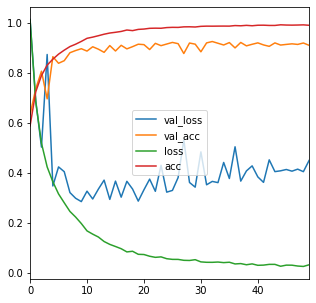

In [19]:
import pandas as pd

historydf = pd.DataFrame(hist.history , index = hist.epoch)
historydf.plot(figsize = (5 , 5))

In [20]:
from keras.models import load_model
model = load_model('../Models/test 14_08_19/classification_angle_with_no_coulomb.hdf5')

###  Test the model

In [21]:
Y_predicted = model.predict(X_test)

In [27]:
Y_pred

array([2., 0., 2., ..., 4., 0., 0.])

In [28]:
Y_test

array([2., 0., 2., ..., 4., 0., 1.])

In [22]:
Y_pred = np.zeros(Y_predicted.shape[0])
for i in range(Y_predicted.shape[0]):
    Y_pred[i] =np.argmax(Y_predicted[i]) 
    
Y_test_output = np.zeros(Y_test.shape[0])
for i in range(Y_test.shape[0]):
    Y_test_output[i] =np.argmax(Y_test[i])

In [29]:
from sklearn.metrics import classification_report

Report = classification_report(Y_test , Y_pred)

In [30]:
#Report with 30000 data simulated and the old data without coulomb
print(Report)

              precision    recall  f1-score   support

         0.0       0.87      0.86      0.86       807
         1.0       0.93      0.87      0.90      2454
         2.0       0.86      0.92      0.89      3251
         3.0       0.91      0.85      0.88      2156
         4.0       0.86      0.91      0.88      1063

    accuracy                           0.89      9731
   macro avg       0.88      0.88      0.88      9731
weighted avg       0.89      0.89      0.89      9731



In [28]:
#Report with 30000 data simulated and the data from Axionaut ( classes
print(Report)

              precision    recall  f1-score   support

         0.0       0.93      0.93      0.93       740
         1.0       0.97      0.97      0.97      3027
         2.0       0.98      0.97      0.97      3770
         3.0       0.97      0.98      0.98      2796
         4.0       0.97      0.97      0.97       957

    accuracy                           0.97     11290
   macro avg       0.96      0.96      0.96     11290
weighted avg       0.97      0.97      0.97     11290



In [26]:
#Report with 30000 data simulated and the old data and 7 classes
print(Report)

              precision    recall  f1-score   support

         0.0       0.84      0.82      0.83       475
         1.0       0.89      0.80      0.84      1283
         2.0       0.90      0.89      0.90      1850
         3.0       0.87      0.92      0.89      2902
         4.0       0.87      0.89      0.88      1953
         5.0       0.87      0.85      0.86      1259
         6.0       0.89      0.84      0.87       789

    accuracy                           0.88     10511
   macro avg       0.88      0.86      0.87     10511
weighted avg       0.88      0.88      0.88     10511



In [21]:
print(Report)
#Report with 30000 data simulated and the old data and LeakReLU

              precision    recall  f1-score   support

         0.0       0.81      0.76      0.79       890
         1.0       0.82      0.81      0.82      2725
         2.0       0.82      0.88      0.84      3408
         3.0       0.79      0.77      0.78      2311
         4.0       0.87      0.81      0.84      1177

    accuracy                           0.82     10511
   macro avg       0.82      0.81      0.81     10511
weighted avg       0.82      0.82      0.82     10511



In [29]:
print(Report)
#Report with just 6000 data simulated and no old data

              precision    recall  f1-score   support

         0.0       0.81      0.78      0.80       137
         1.0       0.89      0.88      0.88       598
         2.0       0.91      0.89      0.90       870
         3.0       0.84      0.88      0.86       579
         4.0       0.89      0.89      0.89       276

    accuracy                           0.88      2460
   macro avg       0.87      0.87      0.87      2460
weighted avg       0.88      0.88      0.88      2460



In [21]:
print(Report)
#Report with 20000 data simulated and no old data

              precision    recall  f1-score   support

         0.0       0.90      0.78      0.83       312
         1.0       0.94      0.92      0.93      1471
         2.0       0.91      0.95      0.93      1839
         3.0       0.92      0.93      0.93      1254
         4.0       0.93      0.88      0.90       384

    accuracy                           0.92      5260
   macro avg       0.92      0.89      0.90      5260
weighted avg       0.92      0.92      0.92      5260



### Acceleration 

In [31]:
#Concatenate all the data
X_speed = np.concatenate([X_1 , X_2 , X_3 , X_4]) 
Y_acc =np.concatenate([Y_acc_1 , Y_acc_2 ,  Y_acc_3 , Y_acc_4])
Y_angle = np.concatenate([Y_angle_1 , Y_angle_2 , Y_angle_3 , Y_angle_4])

In [32]:
#Pour les données de freinage
Y_angle[list(np.where(Y_angle == 270)[0])] = 90

In [33]:
#Enlever les angles correspondant à des marches arrières
truncate = list(np.where(Y_angle>180)[0])

X_speed = np.delete(X_speed , truncate , axis = 0)
Y_angle = np.delete(Y_angle , truncate , axis = 0)
Y_acc = np.delete(Y_acc, truncate , axis = 0)

In [34]:
#Transform the problem of angles to a classification problem
#Pour 5 classes
Y_angle[list(np.where(Y_angle<=35))] = 0
Y_angle[list(np.where((Y_angle>35) & (Y_angle<=75)))] = 1
Y_angle[list(np.where((Y_angle>75) & (Y_angle<=110)))] = 2
Y_angle[list(np.where((Y_angle>110) & (Y_angle<=145)))] = 3
Y_angle[list(np.where((Y_angle>145) & (Y_angle<=180)))] = 4
"""
#Pour 7 classes
Y_angle[list(np.where(Y_angle<=25))] = 0  #extrème droite
Y_angle[list(np.where((Y_angle>25) & (Y_angle<=50)))] = 1 #droite
Y_angle[list(np.where((Y_angle>50) & (Y_angle<=75)))] = 2  #petite droite
Y_angle[list(np.where((Y_angle>75) & (Y_angle<=105)))] = 3   #Tout droit
Y_angle[list(np.where((Y_angle>105) & (Y_angle<=130)))] = 4    #petite gauche
Y_angle[list(np.where((Y_angle>130) & (Y_angle<=155)))] = 5    #gauche
Y_angle[list(np.where((Y_angle>155) & (Y_angle<=180)))] = 6      #extrème gauche
"""

'\n#Pour 7 classes\nY_angle[list(np.where(Y_angle<=25))] = 0  #extrème droite\nY_angle[list(np.where((Y_angle>25) & (Y_angle<=50)))] = 1 #droite\nY_angle[list(np.where((Y_angle>50) & (Y_angle<=75)))] = 2  #petite droite\nY_angle[list(np.where((Y_angle>75) & (Y_angle<=105)))] = 3   #Tout droit\nY_angle[list(np.where((Y_angle>105) & (Y_angle<=130)))] = 4    #petite gauche\nY_angle[list(np.where((Y_angle>130) & (Y_angle<=155)))] = 5    #gauche\nY_angle[list(np.where((Y_angle>155) & (Y_angle<=180)))] = 6      #extrème gauche\n'

(array([5541.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
         759.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

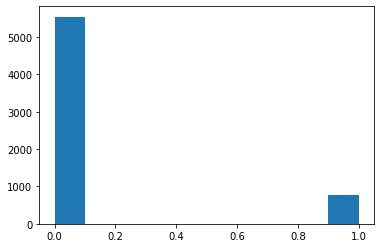

In [35]:
plt.hist(Y_acc)

(array([ 379.,    0., 1088.,    0.,    0., 2381.,    0., 1412.,    0.,
        1040.]),
 array([0. , 0.4, 0.8, 1.2, 1.6, 2. , 2.4, 2.8, 3.2, 3.6, 4. ]),
 <a list of 10 Patch objects>)

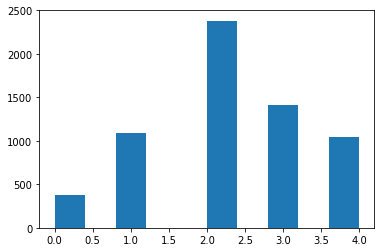

In [36]:
plt.hist(Y_angle)

In [37]:
print('The shape of our data is' , X_speed.shape)

The shape of our data is (6300, 90, 250, 3)


In [38]:
Y_speed = np.concatenate([np.array([Y_acc]) , np.array([Y_angle])] , axis = 0)

In [39]:
Y_speed = Y_speed.T

In [40]:
#train-test split
X_train , X_test , Y_train , Y_test = train_test_split(X_speed , Y_speed , test_size = 0.2 , stratify = Y_angle)

In [41]:
#train-val split
X_train , X_val , Y_train , Y_val = train_test_split(X_train , Y_train , test_size = 0.2 , stratify = Y_train[: , 0])

In [42]:
Y_acc_train = Y_train[: , 0]
Y_angle_train = Y_train[: , 1]

Y_acc_val = Y_val[: , 0]
Y_angle_val = Y_val[: , 1]

Y_acc_test = Y_test[: , 0]
Y_angle_test = Y_test[: , 1]

In [43]:
Y_angle_train_output = np.zeros((Y_angle_train.shape[0] , args['number_of_classes']))
Y_angle_val_output = np.zeros((Y_angle_val.shape[0] , args['number_of_classes']))
Y_angle_test_output = np.zeros((Y_angle_test.shape[0] , args['number_of_classes']))

for i in range(Y_angle_train.shape[0]):
    n = int(Y_angle_train[i])
    Y_angle_train_output[i , n] = 1

for i in range (Y_angle_val.shape[0]):
    n = int(Y_angle_val[i])
    Y_angle_val_output[i , n] = 1
    
for i in range(Y_angle_test.shape[0]):
    n = int(Y_angle_test[i])
    Y_angle_test_output[i , n] = 1

### Transfer learning

In [46]:
from keras.models import load_model
base_model = load_model('../Models/test 14_08_19/classification_angle_with_no_coulomb.hdf5')

In [47]:
base_model.layers.pop() #enlever la Dense pour l'angle
base_model.layers.pop() #Pour la dropout_16
base_model.layers.pop() #Pour la dense 16

In [48]:
base_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
img_in (InputLayer)          (None, 90, 250, 3)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 43, 123, 24)       1824      
_________________________________________________________________
batch_normalization_1 (Batch (None, 43, 123, 24)       96        
_________________________________________________________________
activation_1 (Activation)    (None, 43, 123, 24)       0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 20, 60, 32)        19232     
_________________________________________________________________
batch_normalization_2 (Batch (None, 20, 60, 32)        128       
_________________________________________________________________
activation_2 (Activation)    (None, 20, 60, 32)        0         
__________

In [49]:
def transform_model(base_model ,dropout , number_of_classes):
    from keras.layers import Dense , BatchNormalization , Activation ,  Dropout
    from keras.models import Model

    x = base_model.layers[-1].output

    y = Dense(100 , use_bias = False , name = 'Dense_1')(x)
    y = BatchNormalization()(y)
    y = Activation('relu')(y)
    y = Dropout(dropout)(y)

    y = Dense(50 , use_bias = False , name = 'Dense_2')(y)
    y = BatchNormalization()(y)
    y = Activation('relu')(y)
    y = Dropout(dropout)(y)

    speed_out = Dense(1 , activation = 'sigmoid' , name = 'speed_out')(y)
    #---------------------------------------------------------------------------
    z = Dense(100 , use_bias = False , name = 'Dense_3')(x)
    z = BatchNormalization()(z)
    z = Activation('relu')(z)
    z = Dropout(dropout)(z)

    z = Dense(50 , use_bias = False , name = 'Dense_4')(z)
    z = BatchNormalization()(z)
    z = Activation('relu')(z)
    z = Dropout(dropout)(z)


    angle_out2 = Dense(number_of_classes, activation='softmax', name='angle_out')(z)  
    #-----------------------------------------------------------------
    model = Model(input=base_model.input , output=[angle_out2 , speed_out])

    model.compile(optimizer='adam',

                  loss={'angle_out':'categorical_crossentropy' , 
                        'speed_out' : 'binary_crossentropy'},

                  metrics={'angle_out' : 'accuracy',
                           'speed_out' : 'accuracy'}
                 )
    return model

In [50]:
model = transform_model(base_model , 0.5 , 5)

In [51]:
model.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
img_in (InputLayer)             (None, 90, 250, 3)   0                                            
__________________________________________________________________________________________________
conv2d_1 (Conv2D)               (None, 43, 123, 24)  1824        img_in[0][0]                     
__________________________________________________________________________________________________
batch_normalization_1 (BatchNor (None, 43, 123, 24)  96          conv2d_1[0][0]                   
__________________________________________________________________________________________________
activation_1 (Activation)       (None, 43, 123, 24)  0           batch_normalization_1[0][0]      
__________________________________________________________________________________________________
conv2d_2 (

In [52]:
n_ones = np.where(Y_acc_train == 1)[0].shape[0]
n_zeros = np.where(Y_acc_train == 0)[0].shape[0]
print(n_ones/(n_ones+n_zeros))

0.12251984126984126


In [53]:
Y_angle_train_output.shape

(4032, 5)

In [54]:
model_path = '../Models/test 14_08_19/classification_angle_speed_with_Axionaut_data'
# Train model
model_name = model_path + '.hdf5'
min_delta=.0005

#checkpoint to save model after each epoch
save_best = keras.callbacks.ModelCheckpoint(model_name, 
                                            monitor='val_speed_out_loss', 
                                            verbose=1, 
                                            save_best_only=True, 
                                            mode='min')

#stop training if the validation error stops improving.
early_stop = keras.callbacks.EarlyStopping(monitor='val_loss', 
                                           min_delta=min_delta, 
                                           patience=args['patience'], 
                                           verbose=1, 
                                           mode='auto')
callbacks_list = [save_best]

if args['early_stop']:
    callbacks_list.append(early_stop)
    
hist = model.fit(X_train,[Y_angle_train_output , Y_acc_train],
                nb_epoch=args['epochs'], 
                validation_data=(X_val, [Y_angle_val_output , Y_acc_val]),
                callbacks = callbacks_list,
                batch_size = 64,
                class_weight= {'speed_out' : {0: 0.12, 1: 0.88}} 
                )

Train on 4032 samples, validate on 1008 samples
Epoch 1/50
4032/4032 [==============================] - 5s 1ms/step - loss: 1.5607 - angle_out_loss: 1.4331 - speed_out_loss: 0.1276 - angle_out_acc: 0.4281 - speed_out_acc: 0.6076 - val_loss: 1.3295 - val_angle_out_loss: 0.8719 - val_speed_out_loss: 0.4577 - val_angle_out_acc: 0.6964 - val_speed_out_acc: 0.8115

Epoch 00001: val_speed_out_loss improved from inf to 0.45767, saving model to ../Models/test 14_08_19/classification_angle_speed_with_Axionaut_data.hdf5
Epoch 2/50
4032/4032 [==============================] - 3s 828us/step - loss: 0.9903 - angle_out_loss: 0.9020 - speed_out_loss: 0.0883 - angle_out_acc: 0.6538 - speed_out_acc: 0.7656 - val_loss: 1.2765 - val_angle_out_loss: 0.7910 - val_speed_out_loss: 0.4856 - val_angle_out_acc: 0.7083 - val_speed_out_acc: 0.7946

Epoch 00002: val_speed_out_loss did not improve from 0.45767
Epoch 3/50
4032/4032 [==============================] - 3s 769us/step - loss: 0.7738 - angle_out_loss: 0.7


Epoch 00020: val_speed_out_loss did not improve from 0.08424
Epoch 21/50
4032/4032 [==============================] - 3s 842us/step - loss: 0.0898 - angle_out_loss: 0.0817 - speed_out_loss: 0.0082 - angle_out_acc: 0.9757 - speed_out_acc: 0.9849 - val_loss: 0.6024 - val_angle_out_loss: 0.4889 - val_speed_out_loss: 0.1135 - val_angle_out_acc: 0.8839 - val_speed_out_acc: 0.9653

Epoch 00021: val_speed_out_loss did not improve from 0.08424
Epoch 22/50
4032/4032 [==============================] - 3s 821us/step - loss: 0.0825 - angle_out_loss: 0.0742 - speed_out_loss: 0.0084 - angle_out_acc: 0.9819 - speed_out_acc: 0.9844 - val_loss: 0.5000 - val_angle_out_loss: 0.4285 - val_speed_out_loss: 0.0716 - val_angle_out_acc: 0.9028 - val_speed_out_acc: 0.9792

Epoch 00022: val_speed_out_loss improved from 0.08424 to 0.07157, saving model to ../Models/test 14_08_19/classification_angle_speed_with_Axionaut_data.hdf5
Epoch 23/50
4032/4032 [==============================] - 3s 826us/step - loss: 0.070

4032/4032 [==============================] - 3s 836us/step - loss: 0.0334 - angle_out_loss: 0.0300 - speed_out_loss: 0.0034 - angle_out_acc: 0.9926 - speed_out_acc: 0.9943 - val_loss: 0.7447 - val_angle_out_loss: 0.5941 - val_speed_out_loss: 0.1506 - val_angle_out_acc: 0.8938 - val_speed_out_acc: 0.9613

Epoch 00042: val_speed_out_loss did not improve from 0.07157
Epoch 43/50
4032/4032 [==============================] - 3s 815us/step - loss: 0.0312 - angle_out_loss: 0.0284 - speed_out_loss: 0.0028 - angle_out_acc: 0.9933 - speed_out_acc: 0.9958 - val_loss: 0.6451 - val_angle_out_loss: 0.5498 - val_speed_out_loss: 0.0953 - val_angle_out_acc: 0.8889 - val_speed_out_acc: 0.9762

Epoch 00043: val_speed_out_loss did not improve from 0.07157
Epoch 44/50
4032/4032 [==============================] - 3s 823us/step - loss: 0.0306 - angle_out_loss: 0.0278 - speed_out_loss: 0.0028 - angle_out_acc: 0.9928 - speed_out_acc: 0.9965 - val_loss: 0.7968 - val_angle_out_loss: 0.6725 - val_speed_out_loss: 

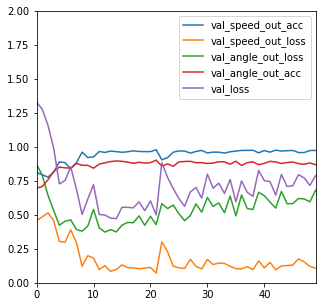

In [55]:
import pandas as pd

historydf = pd.DataFrame(hist.history , index = hist.epoch)
historydf[['val_speed_out_acc' , 'val_speed_out_loss' , 'val_angle_out_loss' , 'val_angle_out_acc' , 'val_loss']].plot( figsize = (5 , 5) )
plt.ylim(0 , 2)
plt.show()

In [56]:
#keeping the best model
model = load_model('../Models/test 14_08_19/classification_angle_speed_with_Axionaut_data.hdf5')

## Import an existing model

In [25]:
from keras.models import load_model
model = load_model('../Models/test 12_08_19/classification_speed_onein_oneout.hdf5')

## Test the model

In [57]:
Y_predicted = model.predict(X_test)

In [58]:
Y_predicted[0].shape

(1260, 5)

In [52]:
#Just for the old model!!!!!!!!
Y_pred_speed = np.zeros(Y_predicted.shape[0])
for i in range(Y_predicted.shape[0]):
    if Y_predicted[i]>0.5:
        Y_pred_speed[i] = 1

AttributeError: 'list' object has no attribute 'shape'

In [59]:
Y_pred_angle = np.zeros(Y_predicted[0].shape[0])
for i in range(Y_predicted[0].shape[0]):
    Y_pred_angle[i] =np.argmax(Y_predicted[0][i]) 

In [60]:
Y_pred_speed = np.zeros(Y_predicted[1].shape[0])
for i in range(Y_predicted[1].shape[0]):
    if Y_predicted[1][i]>0.5:
        Y_pred_speed[i] = 1

In [61]:
from sklearn.metrics import classification_report

Report_angle = classification_report(Y_angle_test , Y_pred_angle)
Report_speed = classification_report(Y_acc_test , Y_pred_speed)

In [62]:
#Report with 30000 data simulated and the old data no coulomb
print(Report_angle)

              precision    recall  f1-score   support

         0.0       0.86      0.97      0.91        76
         1.0       0.90      0.90      0.90       218
         2.0       0.93      0.93      0.93       476
         3.0       0.90      0.86      0.88       282
         4.0       0.95      0.95      0.95       208

    accuracy                           0.92      1260
   macro avg       0.91      0.92      0.91      1260
weighted avg       0.92      0.92      0.92      1260



In [64]:
#Report with 30000 data simulated and the old data no coulomb
print(Report_speed)

              precision    recall  f1-score   support

         0.0       0.99      0.98      0.99      1118
         1.0       0.86      0.94      0.90       142

    accuracy                           0.98      1260
   macro avg       0.93      0.96      0.94      1260
weighted avg       0.98      0.98      0.98      1260



In [39]:
#Report with 30000 data simulated and the Axionaut data
print(Report_angle)

              precision    recall  f1-score   support

         0.0       0.81      0.91      0.86        76
         1.0       0.82      0.88      0.85       218
         2.0       0.85      0.86      0.86       476
         3.0       0.84      0.80      0.82       282
         4.0       0.95      0.87      0.91       208

    accuracy                           0.86      1260
   macro avg       0.85      0.86      0.86      1260
weighted avg       0.86      0.86      0.86      1260



In [40]:
#Report with 300 data simulated and the Axionaut data
print(Report_speed)

              precision    recall  f1-score   support

         0.0       0.98      0.96      0.97      1105
         1.0       0.77      0.88      0.82       155

    accuracy                           0.95      1260
   macro avg       0.87      0.92      0.90      1260
weighted avg       0.96      0.95      0.95      1260



In [46]:
##Report with 30000 data simulated and the old data and 7 classes
print(Report_angle)

              precision    recall  f1-score   support

         0.0       0.91      0.91      0.91        34
         1.0       0.88      0.78      0.83       122
         2.0       0.87      0.73      0.80       138
         3.0       0.86      0.89      0.88       432
         4.0       0.68      0.87      0.76       222
         5.0       0.86      0.65      0.74       156
         6.0       0.96      0.93      0.94       156

    accuracy                           0.83      1260
   macro avg       0.86      0.82      0.84      1260
weighted avg       0.84      0.83      0.83      1260



In [47]:
##Report with 30000 data simulated and the old data and 7 classes
print(Report_speed)

              precision    recall  f1-score   support

         0.0       1.00      0.94      0.97      1122
         1.0       0.67      0.99      0.80       138

    accuracy                           0.95      1260
   macro avg       0.83      0.96      0.88      1260
weighted avg       0.96      0.95      0.95      1260



In [65]:
##Report with 30000 data simulated and the old data and Leaked ReLU
print(Report_angle)

              precision    recall  f1-score   support

         0.0       0.97      0.80      0.88        76
         1.0       0.89      0.78      0.83       218
         2.0       0.85      0.89      0.87       476
         3.0       0.80      0.83      0.82       282
         4.0       0.89      0.94      0.92       208

    accuracy                           0.86      1260
   macro avg       0.88      0.85      0.86      1260
weighted avg       0.86      0.86      0.86      1260



In [66]:
##Report with 30000 data simulated and the old data and Leaked ReLU
print(Report_speed)

              precision    recall  f1-score   support

         0.0       0.99      0.95      0.97      1102
         1.0       0.72      0.96      0.82       158

    accuracy                           0.95      1260
   macro avg       0.86      0.95      0.90      1260
weighted avg       0.96      0.95      0.95      1260



In [34]:
#Report with an old model
print(Report_speed)

              precision    recall  f1-score   support

         0.0       0.88      1.00      0.94      1108
         1.0       0.00      0.00      0.00       152

    accuracy                           0.88      1260
   macro avg       0.44      0.50      0.47      1260
weighted avg       0.77      0.88      0.82      1260



In [50]:
print(Report_angle)
#Report with 30000 data simulated and the old data

              precision    recall  f1-score   support

         0.0       0.94      0.96      0.95        76
         1.0       0.96      0.85      0.90       218
         2.0       0.90      0.92      0.91       476
         3.0       0.81      0.90      0.85       282
         4.0       0.97      0.90      0.93       208

    accuracy                           0.90      1260
   macro avg       0.92      0.91      0.91      1260
weighted avg       0.90      0.90      0.90      1260



In [51]:
print(Report_speed)
#Report with 30000 data simulated and the old data

              precision    recall  f1-score   support

         0.0       0.99      0.98      0.98      1104
         1.0       0.85      0.96      0.90       156

    accuracy                           0.97      1260
   macro avg       0.92      0.97      0.94      1260
weighted avg       0.98      0.97      0.97      1260



In [107]:
print(Report_angle)
#Report with 20000 data simulated and no old data

              precision    recall  f1-score   support

         0.0       0.93      0.97      0.95        76
         1.0       0.95      0.85      0.90       218
         2.0       0.89      0.92      0.91       476
         3.0       0.86      0.89      0.87       282
         4.0       0.95      0.93      0.94       208

    accuracy                           0.91      1260
   macro avg       0.92      0.91      0.91      1260
weighted avg       0.91      0.91      0.91      1260



In [108]:
print(Report_speed)
#Report with 20000 data simulated and no old data

              precision    recall  f1-score   support

         0.0       0.99      0.98      0.99      1120
         1.0       0.85      0.94      0.89       140

    accuracy                           0.97      1260
   macro avg       0.92      0.96      0.94      1260
weighted avg       0.98      0.97      0.98      1260

